In [1]:
import os
import numpy as np
RBPseg_folder = #path to pdb files, unzip the files in the github
AF_folder = #path to pdb files, unzip files in the github

RBP_files = [file for file in os.listdir(RBPseg_folder) if file.endswith(".pdb")]
AF_files = [file for file in os.listdir(AF_folder) if file.endswith(".pdb")]

names = []
for file in RBP_files:
    file = file.replace('_merged_all.pdb_relax.pdb', '')
    #file = (file.replace('YP_', 'YP'))
    names.append(file)
    
print(names)

['QXV79628', 'AEZ65169', 'QCQ65468', 'QXV81162', 'CUL03178', 'QXV79286', 'QXV76844', 'QBQ80311', 'AKO61944', 'ACD75703', 'QXV76923', 'QXV78522', 'QXV77226', 'QXV83111', 'QEG11849', 'QXV77506', 'AEK12502', 'QXV78163', 'QEG04509', 'YP_008530274', 'QXV80938', 'CUL02548', 'QEA10100', 'QBO61254', 'QXV77132', 'AFU62385', 'ASV44893', 'AWD91693', 'CBX44414', 'YP_009145700', 'YP_009600425', 'YP_008530272', 'AFH20211', 'ATE86506', 'AWD91436', 'QXV82990', 'QXV85920', 'YP_009901592', 'AGR46195', 'QXV82780', 'YP_009824934', 'AEM00908', 'AWD91363', 'YP_007112629', 'YP_003912', 'QXV77497', 'QXV77928', 'AWD91690', 'AXC42707', 'QHR65043', 'QXV76504', 'AEV89340', 'QEG11854', 'QBQ80471', 'QBO61257', 'QGK90546', 'QXV85537', 'AKA61060', 'AWD91362', 'ANZ50831', 'QXV82771', 'YP_004414866', 'SMH63897', 'YP_009323872', 'ACB97589', 'QBQ80320']


In [2]:
from Bio import PDB
def extract_b_factors(pdb_file_path):
    structure = PDB.PDBParser(QUIET=True).get_structure('protein', pdb_file_path)

    b_factors = []

    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    if atom.get_name() == 'CA':  # Check if the atom is alpha carbon
                        b_factor = atom.get_bfactor()
                        b_factors.append(b_factor)

            # Break after processing the first chain
            break

    return b_factors



In [3]:
RBP_plddt = []
AF_plddt = []
l = []
AF_per_residue =[]
RBP_per_residue=[]
AF_per_residue_large =[]
RBP_per_residue_large=[]
AF_per_residue_small =[]
RBP_per_residue_small=[]
for name in names:
    path_RBP = RBPseg_folder+name+"_merged_all.pdb_relax.pdb"
    bfactor_RBP = extract_b_factors(path_RBP)
    name=name.replace("YP_","YP")
    path_AF = AF_folder+name+"_trimer.pdb"
    bfactor_AF = extract_b_factors(path_AF)
    #if len(bfactor_AF) == len(bfactor_RBP):
    l.append(len(bfactor_AF))
    RBP_plddt.append(np.mean(bfactor_RBP))
    AF_plddt.append(np.mean(bfactor_AF))
    RBP_per_residue.append(bfactor_RBP)
    AF_per_residue.append(bfactor_AF)
    if len(bfactor_AF) > 1200:
        RBP_per_residue_large.append(bfactor_RBP)
        AF_per_residue_large.append(bfactor_AF)
    else: 
        RBP_per_residue_small.append(bfactor_RBP)
        AF_per_residue_small.append(bfactor_AF)


In [4]:
import pandas as pd
df_plot = pd.DataFrame({'RBP_plddt': RBP_plddt, 'AF_plddt': AF_plddt, 'large': l})

In [5]:
df_plot['difference'] = abs(df_plot['RBP_plddt'] - df_plot['AF_plddt'])

# Find the index where the difference is the largest
max_difference_row_index = df_plot['difference'].idxmax()

# Get the row with the largest difference
row_with_max_difference = df_plot.loc[max_difference_row_index]

# Print the result
print(row_with_max_difference)
print(names[max_difference_row_index])

RBP_plddt      83.971648
AF_plddt       61.055204
large         807.000000
difference     22.916444
Name: 58, dtype: float64
AWD91362


In [6]:
import matplotlib.pyplot as plt
# Calculate the differences
df_plot['difference'] = abs(df_plot['RBP_plddt'] - df_plot['AF_plddt'])

# Get the top 5 rows with the largest differences
top_5_differences = df_plot.nlargest(5, 'difference')



AWD91362
SMH63897
QEG11854
AFU62385
CUL03178
    RBP_plddt   AF_plddt  large  difference
58  83.971648  61.055204    807   22.916444
62  73.009398  53.965590   1279   19.043808
52  78.587556  60.017790   1027   18.569766
25  74.769074  56.921043   1199   17.848032
4   76.205931  59.954237   1192   16.251695


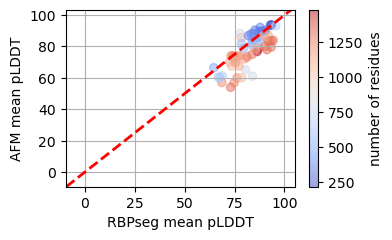

In [7]:
import matplotlib.pyplot as plt

# Create a scatter plot with color based on the 'large' column
plt.figure(figsize=(4, 2.5))
scatter = plt.scatter(df_plot['RBP_plddt'], df_plot['AF_plddt'], c=df_plot['large'], cmap='coolwarm', alpha=0.5)

# Add a colorbar
plt.colorbar(scatter, label='number of residues')

# Add the 45-degree line
plt.axline((0, 0), slope=1, color='red', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('RBPseg mean pLDDT')
plt.ylabel('AFM mean pLDDT')
plt.grid(True)
plt.margins(0.1, 0.1)
plt.tight_layout()

# Show the plot
plt.show()


/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


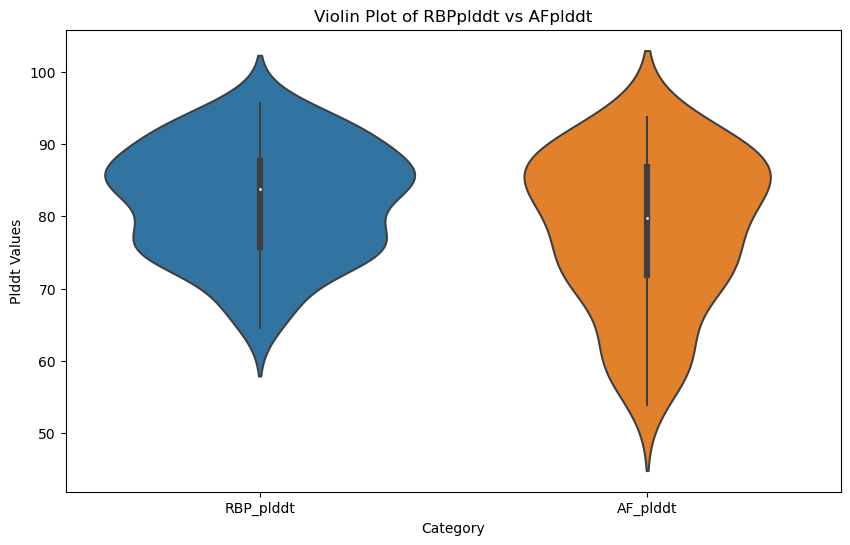

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have RBP_plddt and AF_plddt already defined

# Combine the data into a DataFrame
import pandas as pd
df = pd.DataFrame({'RBP_plddt': RBP_plddt, 'AF_plddt': AF_plddt})

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of RBPplddt vs AFplddt')
plt.xlabel('Category')
plt.ylabel('Plddt Values')

plt.show()


In [10]:
from scipy.stats import ttest_rel

# Perform a paired t-test
t_statistic, p_value = ttest_rel(RBP_plddt, AF_plddt, alternative = "greater")

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.005
if p_value < alpha:
    print("Reject the null hypothesis: RBP_plDDt and AF_plldt are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between RBP_plDDt and AF_plldt.")


T-statistic: 4.952147192637876
P-value: 2.753377945796904e-06
Reject the null hypothesis: RBP_plDDt and AF_plldt are significantly different.


81.82697326276485
76.27388744217922
0.0
Reject the null hypothesis: RBP_plDDt and AF_plldt are significantly different.


/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


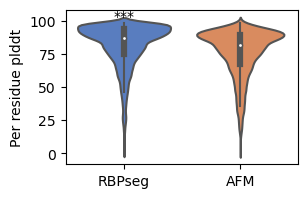

In [11]:
import seaborn as sns

from scipy.stats import mannwhitneyu

def flatten_extend(matrix):
    if isinstance(matrix, (int, float)):
        return [matrix]  # Convert scalar to list
    elif hasattr(matrix, '__iter__'):
        flat_list = []
        for row in matrix:
            if hasattr(row, '__iter__'):
                flat_list.extend(row)
            else:
                flat_list.append(row)
        return flat_list
    else:
        return [matrix]  # Convert non-iterable to list

# Assuming you have RBP_plddt and AF_plddt already defined

RBP_per_residue_large = flatten_extend(RBP_per_residue_large)
AF_per_residue_large = flatten_extend(AF_per_residue_large)
RBP_per_residue_small = flatten_extend(RBP_per_residue_small)
AF_per_residue_small = flatten_extend(AF_per_residue_small)

RBP_per_residue = flatten_extend(RBP_per_residue)
AF_per_residue = flatten_extend(AF_per_residue)
# Combine data into a single DataFrame
import pandas as pd
df = pd.DataFrame({'Condition': ['RBPseg'] * len(RBP_per_residue) + ['AFM'] * len(AF_per_residue),
                   'Values': RBP_per_residue + AF_per_residue})

# Create a violin plot
plt.figure(figsize=(3, 2))
sns.violinplot(x='Condition', y='Values', data=df, palette='muted',split=True)

# Add statistical annotations
RBP_per_residue = np.array(RBP_per_residue)
print(np.mean(RBP_per_residue))
AF_per_residue = np.array(AF_per_residue)
print(np.mean(AF_per_residue))
test_results = mannwhitneyu(RBP_per_residue_large,AF_per_residue_large,  alternative = 'greater') #method = 'exact' ,
p_value = test_results.pvalue

# Round the p-value to a small number (e.g., 1e-15)
#rounded_p_value = max(p_value, 1e-15)

alpha = 0.005
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: RBP_plDDt and AF_plldt are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between RBP_plDDt and AF_plldt.")

if p_value < 0.001:
    p_str = '***' #'p < 0.001'
else:
    p_str = f'p = {p_value:.3f}'

# Adjust the y-coordinate for the stars based on your data distribution
y_max = max(max(RBP_plddt), max(AF_plddt))
y_min = min(min(RBP_plddt), min(AF_plddt))

# Add significance stars
plt.text(0, y_max + 8, p_str, ha='center', va='center', fontsize=10)
#plt.text(1, y_max + 0.05, p_str, ha='center', va='center', fontsize=12)

# Customize the plot
#plt.title('Violin Plot with Significance Stars')
plt.xlabel('')
plt.ylabel('Per residue plddt')

#plt.margins(0.1, 0.1)
#plt.tight_layout()

    # Set plot options
#plt.axis('off')
plt.show()




/var/folders/2p/8071jp1s2ml2vj_81_qt_5680000gn/T/ipykernel_61691/700877419.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RBP_per_residue_large , color='SkyBlue',ax=axes[1])
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before

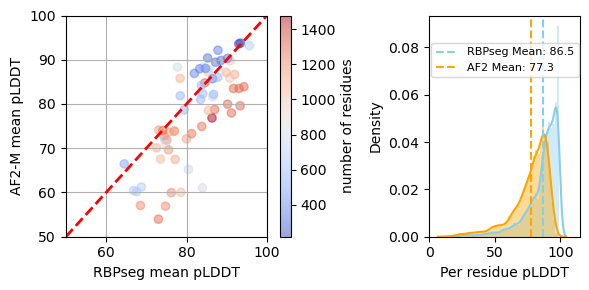

In [12]:
# Create subplots
import seaborn as sns

from scipy.stats import mannwhitneyu
colours = [(0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]
colours.insert(1, 'white')

fig, axes = plt.subplots(1,2, figsize=(6, 3), gridspec_kw={'width_ratios': [2.5, 1.5]})

#df_2 = pd.DataFrame({'Condition': ['RBPseg_large'] * len(RBP_per_residue_large) + ['AFM_large'] * len(AF_per_residue_large) + ['RBPseg_small'] * len(RBP_per_residue_small) + ['AFM_small'] * len(AF_per_residue_small),
                   #'Values': RBP_per_residue_large + AF_per_residue_large + RBP_per_residue_small + AF_per_residue_small})

# Plot the violin plot on the left subplot
#sns.violinplot(x='Condition', y='Values', data=df_2, palette=colours,ax=axes[1],fliersize=1)

sns.distplot(RBP_per_residue_large , color='SkyBlue',ax=axes[1])
sns.distplot(AF_per_residue_large , color='Orange',ax=axes[1])

#sns.distplot(RBP_per_residue_small , color='Blue',ax=axes[1])
#sns.distplot(AF_per_residue_small , color='red',ax=axes[1])


#sns.stripplot(, jitter=True, edgecolor='black', linewidth=0.1, size=2, palette=colours, ax=axes[1], alpha = 0.7)

# Plot the scatter plot on the right subplot
scatter = axes[0].scatter(df_plot['RBP_plddt'], df_plot['AF_plddt'], c=df_plot['large'], cmap='coolwarm', alpha=0.5)

# Add a colorbar
fig.colorbar(scatter, ax=axes[0], label='number of residues')

# Add the 45-degree line
axes[0].axline((0, 0), slope=1, color='red', linestyle='--', linewidth=2)
axes[0].grid(True)
# Set labels and title for both subplots
axes[1].set_ylabel('Density')
axes[1].set_xlabel('Per residue pLDDT', fontsize=10)



mean_RBP = np.mean(RBP_per_residue_large)
mean_AF = np.mean(AF_per_residue_large)
axes[1].axvline(mean_RBP, color='SkyBlue', linestyle='--', label=f'RBPseg Mean: {mean_RBP:.1f}')
axes[1].axvline(mean_AF, color='Orange', linestyle='--', label=f'AF2 Mean: {mean_AF:.1f}')
axes[1].legend(bbox_to_anchor=(0, 0.71), loc="lower left", borderaxespad=0.2, ncol=1, fontsize = 8)
#axes[1].set_title('Violin Plot')

axes[0].set_xlabel('RBPseg mean pLDDT', fontsize=10)
axes[0].set_ylabel('AF2-M mean pLDDT', fontsize=10)
axes[0].set_xlim(50, 100) 
axes[0].set_ylim(50, 100)
#axes[0].set_title('Scatter Plot')

#axes[1].text(0, 104
 #            , p_str, ha='center', va='center', fontsize=10)
#axes[1].set_xticklabels(['RBPseg','AFM'],fontsize=10)
# Adjust layout
plt.xlim(0, 115) 
plt.tight_layout()
plt.show()


In [35]:
df_combined = pd.read_csv('./data/Supplementary_table_1.csv', sep= ';')

/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


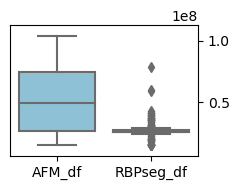

In [21]:
import seaborn as sns

colours = [(0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]
colours.insert(1, 'white')

# Plot violin plot
plt.figure(figsize=(2.5, 2))
sns.boxplot(x='Method', y='MaxRSS', data=df_combined, palette=colours)
#plt.ylim(0, 10e7)
plt.xlabel('')
plt.ylabel('')
plt.margins(0.1, 0.1)
plt.tight_layout()
#plt.yscale('log')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.tight_layout()
    # Set plot options
#plt.axis('off')
plt.show()

/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


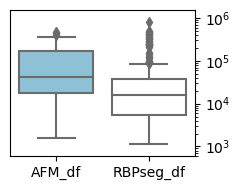

In [24]:
import seaborn as sns
colours = [(0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]
colours.insert(1, 'white')

# Plot violin plot
plt.figure(figsize=(2.5, 2))
sns.boxplot(x='Method', y='AvePages', data=df_combined, palette=colours)
plt.xlabel('')
plt.ylabel('')
plt.margins(0.1, 0.1)

plt.yscale('log')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.tight_layout()
    # Set plot options
#plt.axis('off')
plt.show()

In [33]:
df_d_rbp = pd.read_csv('./data/benchmark/seq_coverage_frac.csv', sep = ' ', header=None)
df_d_rbp[0] = df_d_rbp[0].str.split('/').str[0]
df_tm_rbp =  pd.read_csv('./data/benchmark/meaniptm_RBPseg_2.csv', sep = ' ', header=None)
df_tm_rbp[0] = df_d_rbp[0].str.split('/').str[0]

df_rbp =  pd.merge(df_d_rbp,df_tm_rbp, on=0)
df_rbp.columns=['RBP','mean_coverage','std_coverage','min_coverage','max_coverage','iptm+ptm']
df_rbp['root'] = df_rbp['RBP'].str.split('_seq').str[0]

,RBP,mean_coverage,std_coverage,min_coverage,max_coverage,iptm+ptm,root
0,ACB97589_seq_0,557.053030,524.468343,68.0,1684.0,0.887162,ACB97589
1,ACB97589_seq_1,310.849315,112.581255,51.0,586.0,0.913196,ACB97589
2,ACB97589_seq_2,476.479899,239.270044,66.0,908.0,0.909193,ACB97589
3,ACB97589_seq_3,517.400778,336.107946,37.0,1124.0,0.907227,ACB97589
4,ACB97589_seq_4,332.051724,106.840023,28.0,526.0,0.918246,ACB97589
...,...,...,...,...,...,...,...
253,YP007112629_seq_2,319.929648,426.594614,8.0,1572.0,0.685029,YP007112629
254,YP008530272_seq_0,1180.733925,176.466626,395.0,1409.0,0.817109,YP008530272
255,YP008530272_seq_1,1201.363881,224.885013,19.0,1457.0,0.938124,YP008530272
256,YP009145700_seq_0,439.200000,48.760025,304.0,504.0,0.885402,YP009145700


In [27]:
# Group by the 'root' column and calculate the mean only for numerical columns
mean_df_rbp = df_rbp.groupby('root').mean(numeric_only=True)

# Reset index if you want 'root' to become a column instead of the index
mean_df_rbp = mean_df_rbp.reset_index()


In [31]:
df_d_AFM = pd.read_csv('./data/benchmark/seq_coverage_full.csv', sep = ' ', header=None)
df_d_AFM[0] = df_d_AFM[0].str.split('/').str[0]
df_tm_AFM =  pd.read_csv('/data/benchmark/meaniptm_trimer_2.csv', sep = ' ', header=None)
df_tm_AFM[0] = df_d_AFM[0].str.split('/').str[0]

df_AFM = pd.merge(df_d_AFM,df_tm_AFM, on=0)
df_AFM.columns=['RBP','mean_coverage','std_coverage','min_coverage','max_coverage','iptm+ptm']


/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shj152/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

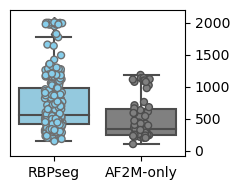

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2.5, 2))
df_AFM['Group'] = 'AF2M-only'
df_rbp['Group'] = 'RBPseg'
# Combine the two DataFrames for comparison
combined_df = pd.concat([df_rbp[['mean_coverage', 'iptm+ptm', 'Group']],df_AFM[['mean_coverage', 'iptm+ptm', 'Group']],
                         ])
sns.boxplot(x='Group', y='mean_coverage', data=combined_df, palette=['skyblue','gray'])
sns.stripplot(x='Group', y='mean_coverage', data=combined_df,  palette=['skyblue','gray'], linewidth=1)
plt.title('')
plt.xlabel('')
plt.ylabel('')

plt.margins(0.1, 0.1)

#plt.yscale('log')
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()
plt.tight_layout()
    # Set plot options
#plt.axis('off')
plt.show()